In [58]:
#import BioPython
import Bio as Bio

In [59]:
import os
os.chdir('C:\\Users\\Senthil\\Desktop\\Bioinfo project')
os.getcwd()

'C:\\Users\\Senthil\\Desktop\\Bioinfo project'

In [60]:
#importing Packages
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [61]:
# importing sequences
O1 = SeqIO.read("sequence_bovine.fasta", "fasta")
O2 = SeqIO.read("sequence_chimp.fasta", "fasta")
O3 = SeqIO.read("sequence_dog.fasta", "fasta")
O4 = SeqIO.read("sequence_gorilla.fasta", "fasta")
O5 = SeqIO.read("sequence_human.fasta", "fasta")
O6 = SeqIO.read("sequence_pig.fasta", "fasta")

In [86]:
#Rename each sequence for ease
O1.id='Bovine'
O2.id='chimp'
O3.id='dog'
O4.id='gorilla'
O5.id='human'
O6.id='pig'

In [87]:
# combine all sequences into a new file
SPP1=SeqIO.write([O1,O2,O3,O4,O5,O6], 'SPP1.fasta', 'fasta')

In [88]:
#Load the SPP1 sequence into MUSCLE
#Upload the new alignment file into working directory
#Open the alignment file as MultipleSeqAlignment Object
with open ("SPP1.clw", 'r') as clw:
    alignment = AlignIO.read(clw,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [89]:
#initiate Distance Calculator using identity model
calculator = DistanceCalculator('identity')

In [90]:
#write the distance the matrix
distance_matrix=calculator.get_distance(alignment)
print(distance_matrix)

pig	0
Bovine	0.24560468833244542	0
dog	0.2477357485348961	0.28449653702717104	0
chimp	0.3889184869472563	0.41182738412360154	0.36174746936600954	0
gorilla	0.257858284496537	0.31326584976025573	0.24187533297815667	0.1395844432605221	0
human	0.2088438998401705	0.2770378263185935	0.23867874267448053	0.24400639318060735	0.11188066062866275	0
	pig	Bovine	dog	chimp	gorilla	human


In [91]:
#open and intitiate tree constructor
constructor = DistanceTreeConstructor(calculator)

In [92]:
#Build a tree
SPP1_tree = constructor.build_tree(alignment)
SPP1_tree.rooted=True
print(SPP1_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner4')
        Clade(branch_length=0.021610282365476824, name='Inner3')
            Clade(branch_length=0.10019312733084706, name='pig')
            Clade(branch_length=0.14541156100159836, name='Bovine')
        Clade(branch_length=0.12170351624933404, name='dog')
        Clade(branch_length=0.05956979222163025, name='Inner2')
            Clade(branch_length=0.04510744095187358, name='human')
            Clade(branch_length=0.06304386432250042, name='Inner1')
                Clade(branch_length=0.00958977091102825, name='gorilla')
                Clade(branch_length=0.12999467234949386, name='chimp')


In [93]:
Phylo.write(SPP1_tree,"SPP1_tree.xml","phyloxml")

1

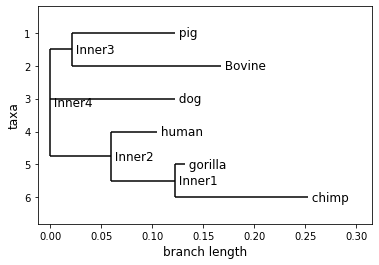

In [94]:
#import matplotlib and create a basic tree
import matplotlib
import matplotlib.pyplot as plt
fig = Phylo.draw(SPP1_tree)

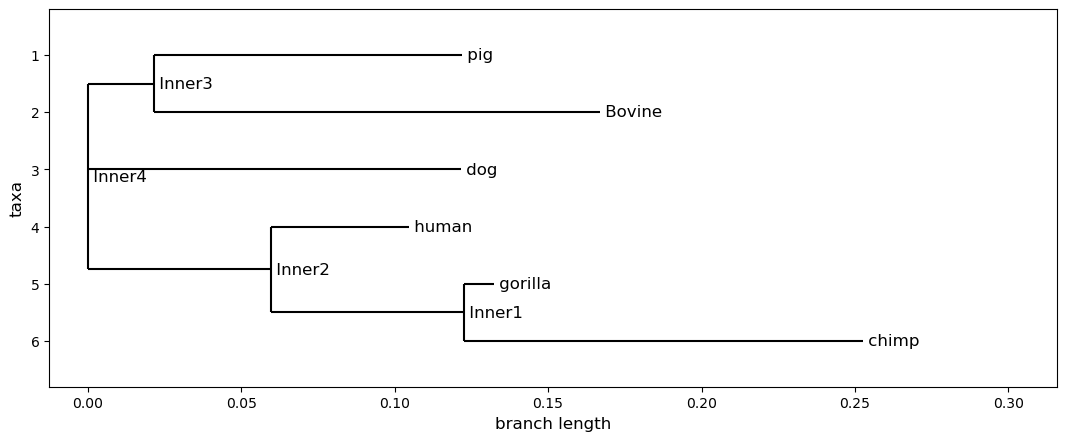

In [95]:
# Make a better looking tree using the features of matplotlib
fig = plt.figure(figsize=(13, 5), dpi=100)     #create figure and set size
matplotlib.rc('font', size=12)               #font size of leaf and node labels
matplotlib.rc('xtick',labelsize=10)          #fontsize of the tick labels
matplotlib.rc('ytick',labelsize=10)          #fontsize of the tick labels
#SPP1_tree.ladderize()
axes=fig.add_subplot(1,1,1)
Phylo.draw(SPP1_tree,axes=axes)
fig.savefig("SPP1_cladogram")

In [96]:
#To quickly draw a tree without creating new objects
Phylo.draw_ascii(SPP1_tree)

       ___________________________ pig
  ____|
 |    |_______________________________________ Bovine
 |
_|________________________________ dog
 |
 |                ___________ human
 |_______________|
                 |                 __ gorilla
                 |________________|
                                  |___________________________________ chimp



In [97]:
#Convert the tree to different format (optional)
Phylo.convert('SPP1_tree.xml','phyloxml','SPP1_tree.nex','nexus')

1

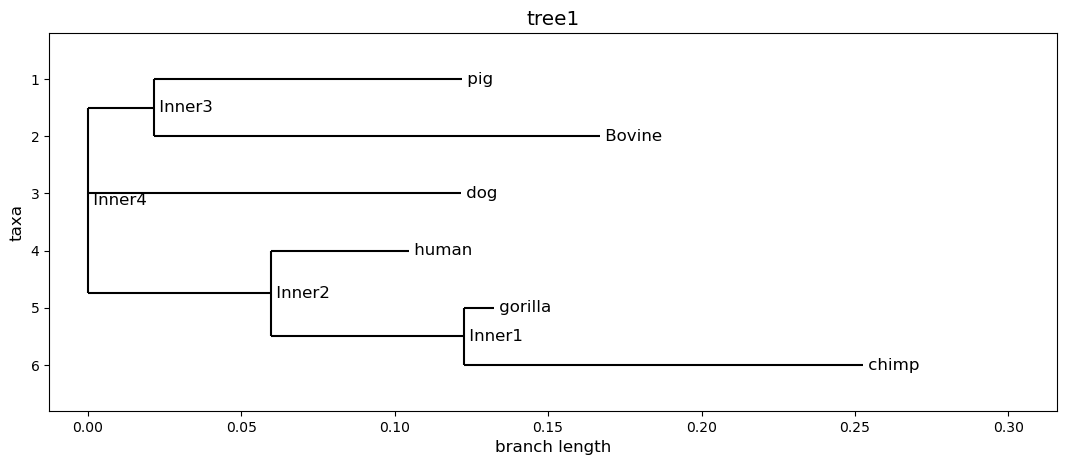

In [98]:
#Manual editing to make the tree better  (removing inner labels)
SPP1_nex=Phylo.read('SPP1_tree.nex','nexus')

fig = plt.figure(figsize=(13, 5), dpi=100)     #create figure and set size
matplotlib.rc('font', size=12)               #font size of leaf and node labels
matplotlib.rc('xtick',labelsize=10)          #fontsize of the tick labels
matplotlib.rc('ytick',labelsize=10)          #fontsize of the tick labels
#SPP1_tree.ladderize()
axes=fig.add_subplot(1,1,1)
Phylo.draw(SPP1_nex,axes=axes)
fig.savefig("SPP1new_cladogram")

In [99]:
#Construct tree using UPGMA algorithm
UPGMATree = constructor.upgma(distance_matrix)

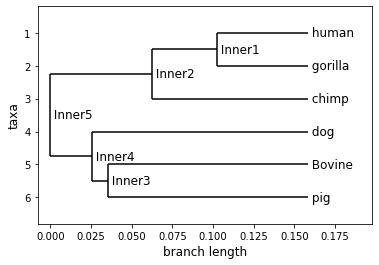

In [100]:
Phylo.draw(UPGMATree)

In [101]:
# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distance_matrix)

In [102]:
Phylo.draw_ascii(NJTree)

       ___________________________ pig
  ____|
 |    |_______________________________________ Bovine
 |
_|________________________________ dog
 |
 |                ___________ human
 |_______________|
                 |                 __ gorilla
                 |________________|
                                  |___________________________________ chimp



In [103]:
#Reading a tree file and creating a simple ASCII-art dendrogram
Phylo.convert('SPP1_tree.xml','phyloxml',"SPP1_tree.dnd",'newick')
tree=Phylo.read("SPP1_tree.newick",'newick')
Phylo.draw_ascii(tree)

       ___________________________ pig
  ____|
 |    |_______________________________________ Bovine
 |
_|________________________________ dog
 |
 |                ___________ human
 |_______________|
                 |                 __ gorilla
                 |________________|
                                  |___________________________________ chimp



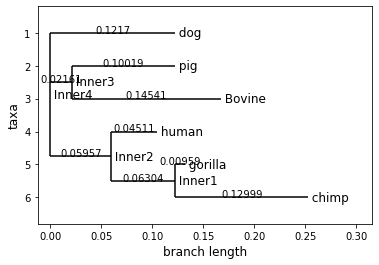

In [104]:
#Create using draw function when Matplotlib or pyplot is installed
tree.rooted=True
tree.ladderize()
Phylo.draw(tree, branch_labels=lambda c: c.branch_length)


In [105]:
#converting to XML format (in BioPython 1.55)
#Note: Newick and Nexus dont support branch color and width, these attributes can be saved only in PhyloXML format
tree = tree.as_phyloxml()

In [106]:
#Giving colors to the branches
tree.root.color=("gray")
tree.clade[0,1].color="blue"    #[0,1] refers to second child of the first child of the root
tree.clade[2,1].color="salmon"
tree.ladderize()
Phylo.draw(tree)

IndexError: list index out of range

In [107]:
tree.

SyntaxError: invalid syntax (Temp/ipykernel_12884/766987624.py, line 1)

In [ ]:
import sys
Phylo.write(tree, sys.stdout, "phyloxml")

In [ ]:
#ParsimonyTreeConstructor
# from Bio import AlignIO
# from Bio.Phylo.TreeConstruction import *
# aln = AlignIO.read(open('Tree/TreeConstruction/msa.phy'), 'phylip')
# starting_tree = Phylo.read('Tree/TreeConstruction/nj.tre', 'newick')
# scorer = ParsimonyScorer()
# searcher = NNITreeSearcher(scorer)
# constructor = ParsimonyTreeConstructor(searcher, starting_tree)
# pars_tree = constructor.build_tree(aln)
# print(pars_tree)

In [57]:
# #To get the consensus tree, we must construct a list of bootstrap replicate trees
# from Bio import Phylo
# from Bio.Phylo.Consensus import *

# msa = AlignIO.read("Tests/TreeConstruction/msa.phy", "phylip")
# msas = bootstrap(msa, 100)